## Importing neccessary

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")


In [2]:
wine=datasets.load_wine()

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
x=pd.DataFrame(wine.data,columns=wine.feature_names)
y=pd.DataFrame(wine.target,columns=["Class"])

In [5]:
y.Class[y["Class"]==0]="class_0"
y.Class[y["Class"]==1]="class_1"
y.Class[y["Class"]==2]="class_2"

In [6]:
y_encoded=wine.target

### EDA 

In [7]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
print("Instances and features : ",x.shape)

Instances and features :  (178, 13)


In [10]:
x.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

### Data scaling

In [11]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


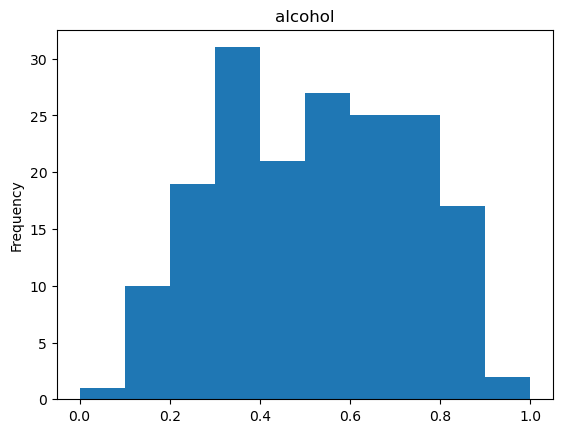

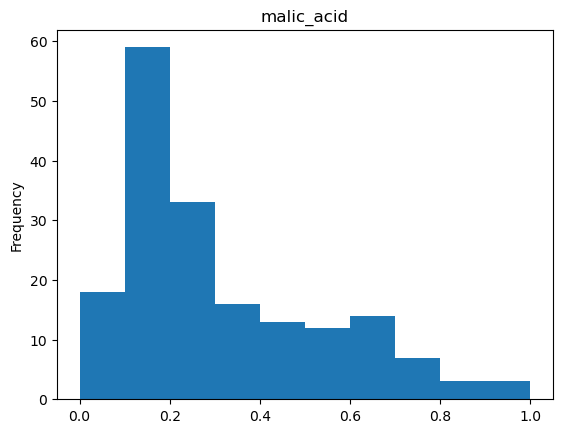

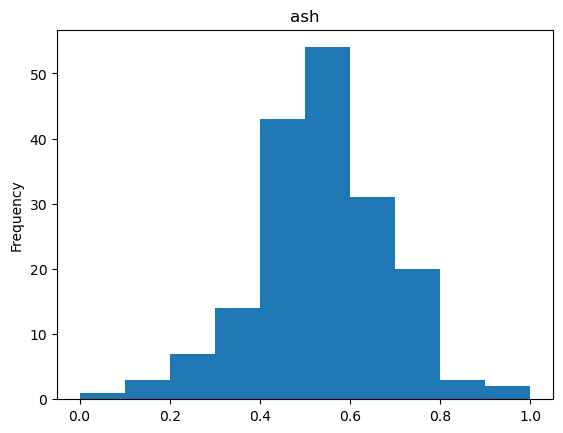

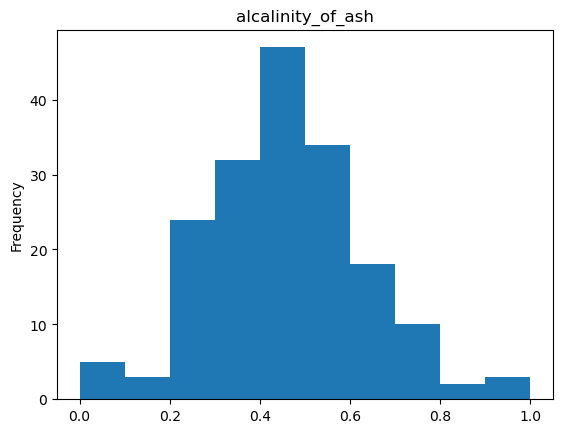

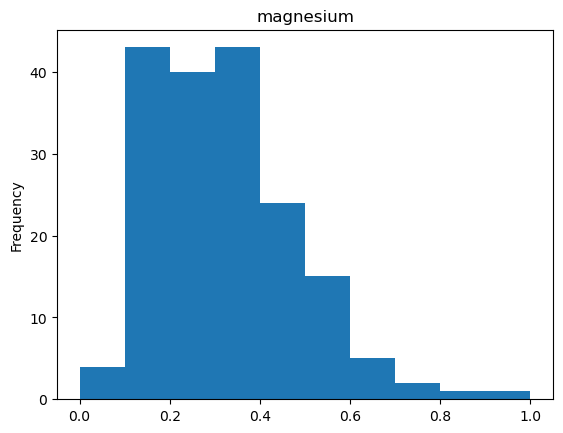

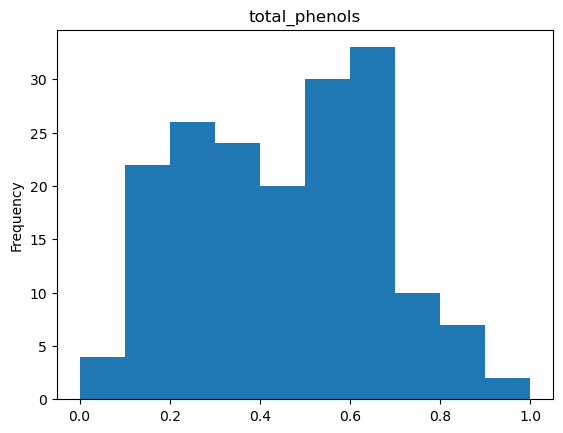

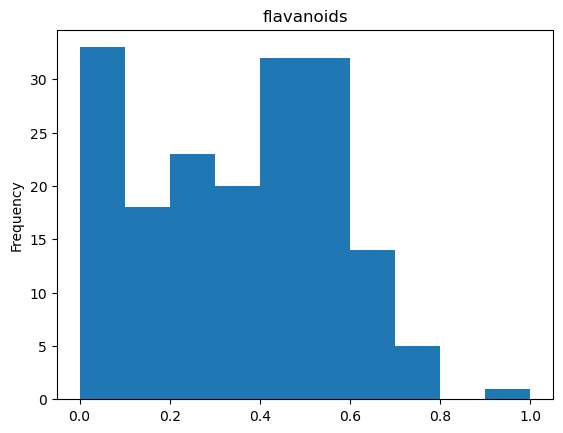

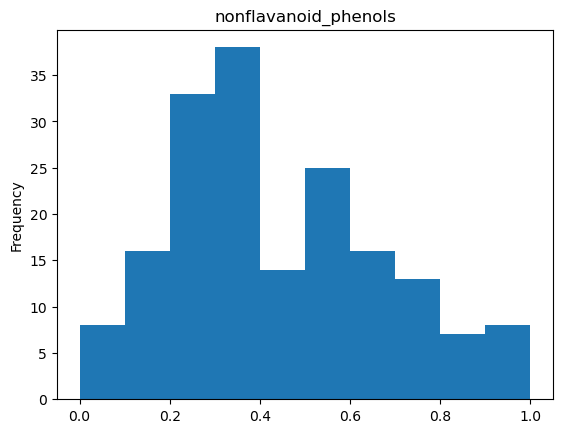

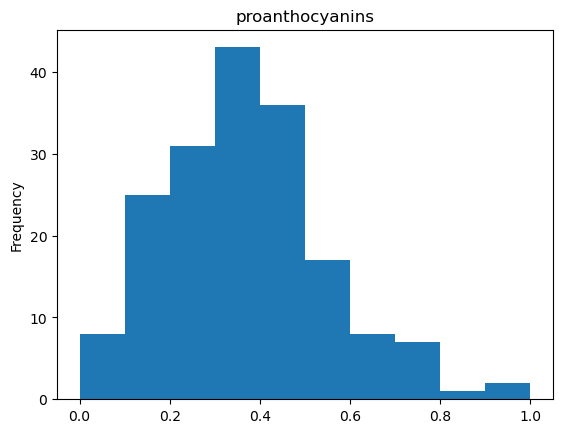

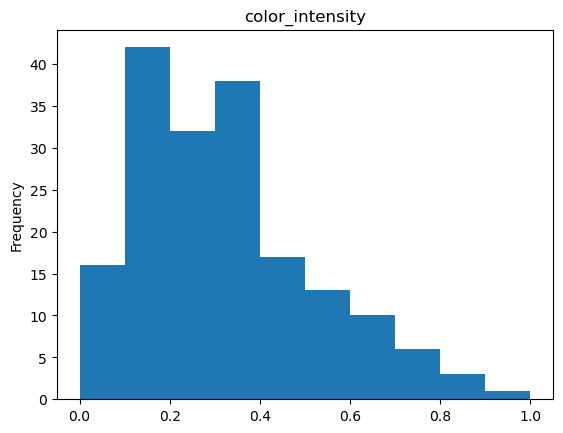

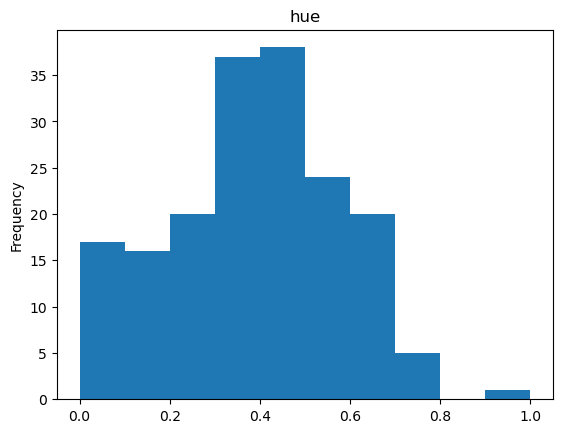

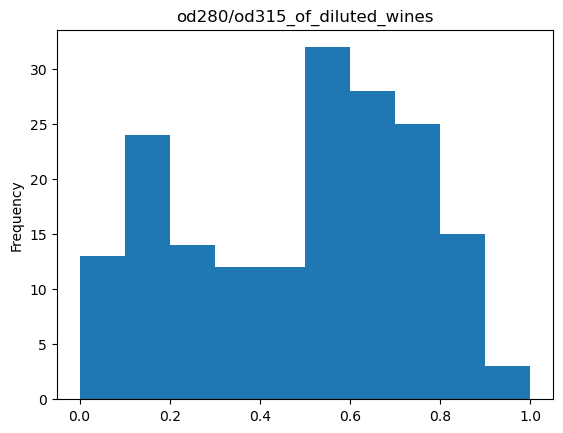

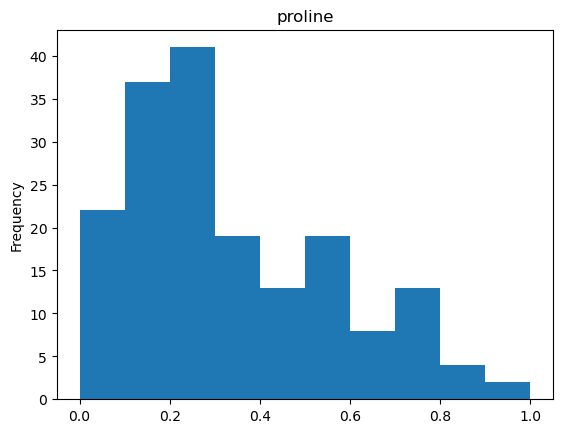

In [12]:
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df[col].plot(kind='hist', title=col)
        plt.show()
    for col in categorical_cols:
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()
        
plot_histograms(x)

Interpretation:
Almost all features are normally distributed

## Splitting Training model building

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

### Finding optimal K value

In [14]:
k=5
scores=[]
ks=[i for i in range(3,11,2)]
for i in ks:
    model=KNeighborsClassifier(i)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    scores.append(model.score(xtrain,ytrain))
print("The best K value = :",ks[scores.index(np.max(scores))])
    

The best K value = : 3


In [15]:
model=KNeighborsClassifier(3)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.971830985915493

In [16]:
ypred=model.predict(xtest)

### Evaluating model

In [17]:
from sklearn.metrics import accuracy_score as acc

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [20]:
incorrect_obs=pd.DataFrame({"Actual":ytest,"Predicted":ypred,"Correctness":[ypred[i]==ytest[i] for i in range(len(ypred))]})
incorrect_obs

,Actual,Predicted,Correctness
0,0,0,True
1,0,0,True
2,2,2,True
3,0,0,True
4,1,1,True
5,0,0,True
6,1,1,True
7,2,2,True
8,1,1,True
9,2,2,True


In [21]:
print("Accuracy : ",acc(ypred,ytest))

Accuracy :  0.9444444444444444


In [34]:
from sklearn.neighbors import NearestNeighbors as nn

In [56]:
wrong_pred=[i for i in range(len(ytest)) if(ypred[i]!=ytest[i])]

In [70]:
model.fit(xtest,ytest)

NearestNeighbors(n_neighbors=3)

In [71]:
model.kneighbors(xtest.iloc[wrong_pred],return_distance=False)

array([[13,  9, 32],
       [27, 16,  8]], dtype=int64)

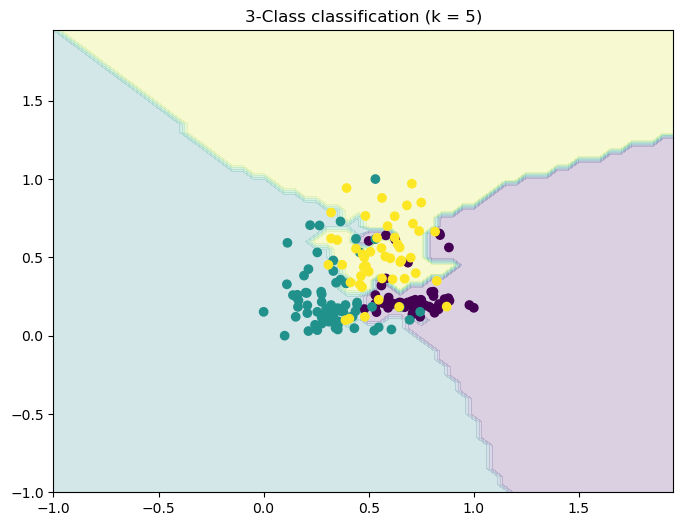

In [22]:
X = x.to_numpy()
y = y_encoded
# Plot the decision boundary. Predict on a mesh
h = 0.05
clf=KNeighborsClassifier(3)
clf.fit(X[:,0:2],y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# create a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2)
# Plot also the training points
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (k))
plt.show()

### Conclusion:
A accuracy score of 0.94 for a K-Nearest Neighbor (KNN) model is an ideal result, indicating that the model has perfectly classified all the samples in the test set.